# Question 2: Supervised Learning


For the second part of the assessment, we will be using supervised machine learning models on our newly built dataframe and calculate the accuracy and find the model with best accuracy.

In [1]:
# Important necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the data into the dataframe
df = pd.read_csv("quora_supervised.csv")

In [3]:
df.head()

,Unnamed: 0,question,Topic Number,Topic Description
0,0,What is the step by step guide to invest in sh...,5,Humanities
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0,"Education, Schools, and Learning"
2,2,How can I increase the speed of my internet co...,3,Activities
3,3,Why am I mentally very lonely? How can I solve...,8,"Business, Work and Careers"
4,4,"Which one dissolve in water quikly sugar, salt...",1,"Science,Social Media and Technology"


In [4]:
# Now we will do some random statistical calculations or outputs on the dataframe
df["Topic Number"].value_counts()
# It will represent the topic number alongwith the questions in that particular topic

0    30034
5    26185
9    25991
7    24475
1    23225
6    22291
8    15317
3    11819
4    10664
2     9999
Name: Topic Number, dtype: int64

In [5]:
df.sample(20)

,Unnamed: 0,question,Topic Number,Topic Description
194567,194567,Why does the flame of fire always go upward?,1,"Science,Social Media and Technology"
45415,45415,What's the best way to manage traffic in Citie...,0,"Education, Schools, and Learning"
171573,171573,Can we improve eyesight naturally without surg...,7,Major Concepts
88666,88666,When will Facebook fall as a social network?,6,"Art, Design and Style"
68382,68382,How do you build homes?,9,"Life, Relationship and Self"
161610,161610,How can I transfer my WhatsApp account from on...,3,Activities
83060,83060,Why are Salman Khan fans called Bhaitards?,5,Humanities
186573,186573,Sodium hydroxide and copper (II) sulphate reac...,5,Humanities
197028,197028,How can I contact Quora if I have a problem? H...,2,"Engineering, Computer Science and Mathematics"
166192,166192,Which coaching institutes are the best for CAT?,0,"Education, Schools, and Learning"


In [6]:
# Viewing the description of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         200000 non-null  int64 
 1   question           200000 non-null  object
 2   Topic Number       200000 non-null  int64 
 3   Topic Description  200000 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


In [17]:
df.count()

Unnamed: 0           200000
question             200000
Topic Number         200000
Topic Description    200000
dtype: int64

In [18]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [13]:
from matplotlib import pyplot as plt

In [15]:
import seaborn as sns

count    200000.000000
mean          4.568935
std           3.087982
min           0.000000
25%           1.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: Topic Number, dtype: float64


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


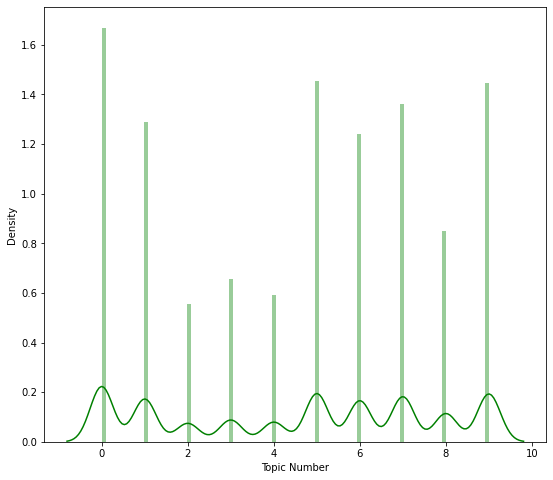

In [16]:
# Distribution of topics
print(df['Topic Number'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Topic Number'], color='g', bins=100, hist_kws={'alpha': 0.4});

<AxesSubplot:xlabel='Topic Number'>

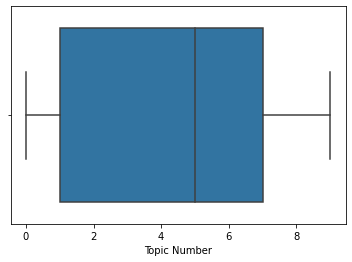

In [19]:
sns.boxplot(x=df['Topic Number'])

The next step is to preprocess the data and divide it into training and testing before going further into machine learning models. So we will do the preprocessing first.

In [26]:
# importing model for train_test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# We have divided the data into train and test

In [27]:
# improting the model
from sklearn.feature_extraction.text import TfidfVectorizer
# creating an instance of model
tfidf = TfidfVectorizer(max_df=0.90, min_df=4, stop_words="english", lowercase ="True")


In [28]:
# fitting the data into tfidf model
y = df["Topic Number"]
X = tfidf.fit_transform(df["question"])

# Training a Logistic Regression Classifier

In [29]:
# Step 1: Importing the model
from sklearn.linear_model import LogisticRegression

In [30]:
# Step 2: We need to create an instance of model we have imported
lin_reg_model = LogisticRegression(solver='lbfgs')

In [31]:
# Step 3: Fitting the data into our model instance
lin_reg_model.fit(X_train, y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Step 4: We will be testing the accuracy of the model
# For that, import the metrics library
from sklearn import metrics

In [33]:
# Now we will create a prediction set and the model has not yet seen it.
lin_reg_model_predictions = lin_reg_model.predict(X_test)
# We will be predicting the model using the X_test

In [34]:
lin_reg_model_predictions

array([7, 8, 0, ..., 9, 0, 4], dtype=int64)

In [35]:
# Now we will build a confusion matrix to observe the predicted output
print(metrics.confusion_matrix(y_test, lin_reg_model_predictions))

[[5485   56   13   11   12   63   33   75   13  212]
 [  42 4112    8   14   19   63   47   53   18  143]
 [  34   44 1763   17   10   32   28   44   19   49]
 [  64   46   10 2044    4   53   27   37   18   86]
 [  21   39    2   10 1857   47   38   31   15   59]
 [  74   78    8   12   24 4725   62   61   36  138]
 [  63   65   41   18   21  118 3866   52   26  182]
 [ 101   61   13   16   23   66   45 4443   14  114]
 [  45   51    7   14    9   83   32   40 2732   82]
 [  96  107   14   17   24  115   88   45   26 4767]]


In [36]:
# Now we can build a classification report
print(metrics.classification_report(y_test, lin_reg_model_predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5973
           1       0.88      0.91      0.90      4519
           2       0.94      0.86      0.90      2040
           3       0.94      0.86      0.90      2389
           4       0.93      0.88      0.90      2119
           5       0.88      0.91      0.89      5218
           6       0.91      0.87      0.89      4452
           7       0.91      0.91      0.91      4896
           8       0.94      0.88      0.91      3095
           9       0.82      0.90      0.86      5299

    accuracy                           0.89     40000
   macro avg       0.91      0.89      0.90     40000
weighted avg       0.90      0.89      0.90     40000



In [37]:
# Now getting the overall accuracy of our Linear Regression Model
print(metrics.accuracy_score(y_test,lin_reg_model_predictions))

0.89485


It can be seen above that the Linear Regression Model has an accuracy of 89.49%

# Training a Naive Bayes Classifier

In [38]:
# Now we will be working with Naive Bayes Classifier

In [39]:
# Step 1: Importing the model
from sklearn.naive_bayes import MultinomialNB

In [40]:
# Step 2: We need to create an instance of model we have imported
nb_model = MultinomialNB()

In [41]:
# Step 3: Fitting the data into our model instance
nb_model.fit(X_train, y_train)

MultinomialNB()

In [42]:
# Now getting the results from our model
# Now we will create a prediction set and the model has not yet seen it.
nb_model_predictions = nb_model.predict(X_test)
# We will be predicting the model using the X_test

In [43]:
# Presenting the results in a confusion matrix
print(metrics.confusion_matrix(y_test, nb_model_predictions))

[[5032   98   39   28   17  115  109  372   15  148]
 [ 147 3329   46   43   23  237  145  135   40  374]
 [ 152   85 1333   32   10   72  103  145   13   95]
 [ 383  116   19 1266    7  112  140  127   43  176]
 [ 111  161    7    9 1252  115  127  125   17  195]
 [ 352  211   16   34   18 3899  182  183   67  256]
 [ 191  212   39   21   26  290 3118  135   28  392]
 [ 435  171   14   29   13  165  101 3769   15  184]
 [ 240  239    9   33    8  278  124  186 1751  227]
 [ 369  256   20   30   38  331  236  208   27 3784]]


In [44]:
# Now we can build a classification report
print(metrics.classification_report(y_test, nb_model_predictions))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      5973
           1       0.68      0.74      0.71      4519
           2       0.86      0.65      0.74      2040
           3       0.83      0.53      0.65      2389
           4       0.89      0.59      0.71      2119
           5       0.69      0.75      0.72      5218
           6       0.71      0.70      0.71      4452
           7       0.70      0.77      0.73      4896
           8       0.87      0.57      0.69      3095
           9       0.65      0.71      0.68      5299

    accuracy                           0.71     40000
   macro avg       0.76      0.69      0.71     40000
weighted avg       0.73      0.71      0.71     40000



In [45]:
# Now getting the overall accuracy of our Naive Bayes Classifier
print(metrics.accuracy_score(y_test,nb_model_predictions))

0.713325


It can be seen that Naive Bayes model has an accuracy of 71.33%

# Training a Random Forest Model

In [46]:
# Step 1: Importing the model
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Step 2: We need to create an instance of model we have imported
rf_model = RandomForestClassifier()

In [48]:
# Step 3: Fitting the data into our model instance
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Now getting the results from our model
# Now we will create a prediction set and the model has not yet seen it.
rf_model_predictions = rf_model.predict(X_test)
# We will be predicting the model using the X_test

In [50]:
# Presenting the results in a confusion matrix
print(metrics.confusion_matrix(y_test, rf_model_predictions))

[[5731   36   13   21   17   33   17   57    9   39]
 [ 142 4103   15   18   21   47   46   39   20   68]
 [  35   13 1880   22    5    8   23   26   11   17]
 [  65   17    9 2205    5   18    9   27   10   24]
 [  40   23    3    5 1963   18   28   20    3   16]
 [ 136   50   13   19   35 4738   42   57   21  107]
 [ 115   30   48    8   27   66 4031   40   18   69]
 [ 145   53   25   18   25   45   34 4486   17   48]
 [  61   37    4   21    9   33   26   27 2840   37]
 [ 199   66   23   30   21   89   76   63   17 4715]]


In [51]:
# Now we can build a classification report
print(metrics.classification_report(y_test, rf_model_predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5973
           1       0.93      0.91      0.92      4519
           2       0.92      0.92      0.92      2040
           3       0.93      0.92      0.93      2389
           4       0.92      0.93      0.92      2119
           5       0.93      0.91      0.92      5218
           6       0.93      0.91      0.92      4452
           7       0.93      0.92      0.92      4896
           8       0.96      0.92      0.94      3095
           9       0.92      0.89      0.90      5299

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000



In [52]:
# Now getting the overall accuracy of our Random Forest Model
print(metrics.accuracy_score(y_test,rf_model_predictions))

0.9173


It can be seen that Random Forest model has an accuracy of 91.73%

# Train a Support Vector Classifier(SVC)

In [53]:
# Step 1: Importing the model
from sklearn.svm import SVC

In [54]:
# Step 2: We need to create an instance of model we have imported
svc_model = SVC(gamma="auto")

In [55]:
# Step 3: Fitting the data into our model instance
svc_model.fit(X_train, y_train)

SVC(gamma='auto')

In [56]:
# Now getting the results from our model
# Now we will create a prediction set and the model has not yet seen it.
svc_model_predictions = svc_model.predict(X_test)
# We will be predicting the model using the X_test

In [57]:
# Presenting the results in a confusion matrix
print(metrics.confusion_matrix(y_test, svc_model_predictions))

[[5973    0    0    0    0    0    0    0    0    0]
 [4519    0    0    0    0    0    0    0    0    0]
 [2040    0    0    0    0    0    0    0    0    0]
 [2389    0    0    0    0    0    0    0    0    0]
 [2119    0    0    0    0    0    0    0    0    0]
 [5218    0    0    0    0    0    0    0    0    0]
 [4452    0    0    0    0    0    0    0    0    0]
 [4896    0    0    0    0    0    0    0    0    0]
 [3095    0    0    0    0    0    0    0    0    0]
 [5299    0    0    0    0    0    0    0    0    0]]


In [58]:
# Now we can build a classification report
print(metrics.classification_report(y_test, svc_model_predictions))

              precision    recall  f1-score   support

           0       0.15      1.00      0.26      5973
           1       0.00      0.00      0.00      4519
           2       0.00      0.00      0.00      2040
           3       0.00      0.00      0.00      2389
           4       0.00      0.00      0.00      2119
           5       0.00      0.00      0.00      5218
           6       0.00      0.00      0.00      4452
           7       0.00      0.00      0.00      4896
           8       0.00      0.00      0.00      3095
           9       0.00      0.00      0.00      5299

    accuracy                           0.15     40000
   macro avg       0.01      0.10      0.03     40000
weighted avg       0.02      0.15      0.04     40000



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Now getting the overall accuracy of our Support Vector Machine
print(metrics.accuracy_score(y_test,svc_model_predictions))

0.149325


It can be seen that Support Vector Classifier model has an accuracy of 14.93% which is least in all 4 models.

As we can see our results that the best model is Random Forest with an overall accuracy of 91.78%. All the steps taken to choose this model has been described thoroughly. Next, we will choose random questions from our dataset to further confirm the accuracy of our model.

The SVC model took most time for processing, aroud 2 hours in total. Rest of the moodels run quick.